# Importing Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

# Reading the Dataset

In [2]:
dataset = pd.read_csv('Crime.csv')

dataset.sample(5)

,CrimeRate,Youth,Southern,Education,ExpenditureYear0,LabourForce,Males,MoreMales,StateSize,YouthUnemployment,...,ExpenditureYear10,LabourForce10,Males10,MoreMales10,StateSize10,YouthUnemploy10,MatureUnemploy10,HighYouthUnemploy10,Wage10,BelowWage10
30,112.1,142,1,10.9,81,497,956,0,33,116,...,77,501,962,0,33,117,44,0,500,256
24,104.3,134,0,12.5,75,595,972,0,47,83,...,71,599,982,0,50,87,32,0,649,182
32,115.1,131,0,13.7,78,574,1038,1,7,142,...,73,581,1029,1,7,143,41,1,615,177
12,83.1,135,0,13.6,62,595,986,0,22,77,...,61,599,993,0,23,80,28,0,591,189
27,107.2,148,0,13.7,72,601,998,0,9,84,...,66,602,999,0,9,87,15,0,656,151


# Dataset Info

In [3]:
dataset.describe()

,CrimeRate,Youth,Southern,Education,ExpenditureYear0,LabourForce,Males,MoreMales,StateSize,YouthUnemployment,...,ExpenditureYear10,LabourForce10,Males10,MoreMales10,StateSize10,YouthUnemploy10,MatureUnemploy10,HighYouthUnemploy10,Wage10,BelowWage10
count,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,...,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000,47.000000
mean,102.808511,138.574468,0.340426,12.391489,85.000000,561.191489,983.021277,0.191489,36.617021,95.468085,...,80.234043,565.531915,986.872340,0.212766,37.702128,97.446809,33.361702,0.404255,594.638298,192.957447
std,28.893266,12.567634,0.478975,1.120332,29.718974,40.411814,29.467365,0.397727,38.071188,18.028783,...,27.961319,37.645284,29.845702,0.413688,39.490734,17.843289,8.414340,0.496053,93.749765,38.756182
min,45.500000,119.000000,0.000000,10.000000,45.000000,480.000000,934.000000,0.000000,3.000000,70.000000,...,41.000000,497.000000,935.000000,0.000000,3.000000,71.000000,15.000000,0.000000,359.000000,126.000000
25%,82.700000,130.000000,0.000000,11.550000,62.500000,530.500000,964.500000,0.000000,10.000000,80.500000,...,58.500000,538.000000,969.500000,0.000000,11.000000,82.000000,28.000000,0.000000,530.000000,165.000000
50%,103.000000,136.000000,0.000000,12.400000,78.000000,560.000000,977.000000,0.000000,25.000000,92.000000,...,73.000000,563.000000,983.000000,0.000000,25.000000,93.000000,34.000000,0.000000,615.000000,182.000000
75%,120.650000,146.000000,1.000000,13.200000,104.500000,593.000000,992.000000,0.000000,41.500000,104.000000,...,97.000000,599.000000,994.000000,0.000000,43.000000,108.500000,39.000000,1.000000,659.500000,229.500000
max,161.800000,177.000000,1.000000,15.100000,166.000000,641.000000,1071.000000,1.000000,168.000000,142.000000,...,157.000000,641.000000,1079.000000,1.000000,180.000000,143.000000,59.000000,1.000000,748.000000,257.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CrimeRate            47 non-null     float64
 1   Youth                47 non-null     int64  
 2   Southern             47 non-null     int64  
 3   Education            47 non-null     float64
 4   ExpenditureYear0     47 non-null     int64  
 5   LabourForce          47 non-null     int64  
 6   Males                47 non-null     int64  
 7   MoreMales            47 non-null     int64  
 8   StateSize            47 non-null     int64  
 9   YouthUnemployment    47 non-null     int64  
 10  MatureUnemployment   47 non-null     int64  
 11  HighYouthUnemploy    47 non-null     int64  
 12  Wage                 47 non-null     int64  
 13  BelowWage            47 non-null     int64  
 14  CrimeRate10          47 non-null     float64
 15  Youth10              47 non-null     int64

# Null values & duplicates

In [5]:
dataset.isnull().sum()

CrimeRate              0
Youth                  0
Southern               0
Education              0
ExpenditureYear0       0
LabourForce            0
Males                  0
MoreMales              0
StateSize              0
YouthUnemployment      0
MatureUnemployment     0
HighYouthUnemploy      0
Wage                   0
BelowWage              0
CrimeRate10            0
Youth10                0
Education10            0
ExpenditureYear10      0
LabourForce10          0
Males10                0
MoreMales10            0
StateSize10            0
YouthUnemploy10        0
MatureUnemploy10       0
HighYouthUnemploy10    0
Wage10                 0
BelowWage10            0
dtype: int64

In [6]:
dataset.duplicated().sum()

0

# Check correlation

<AxesSubplot:>

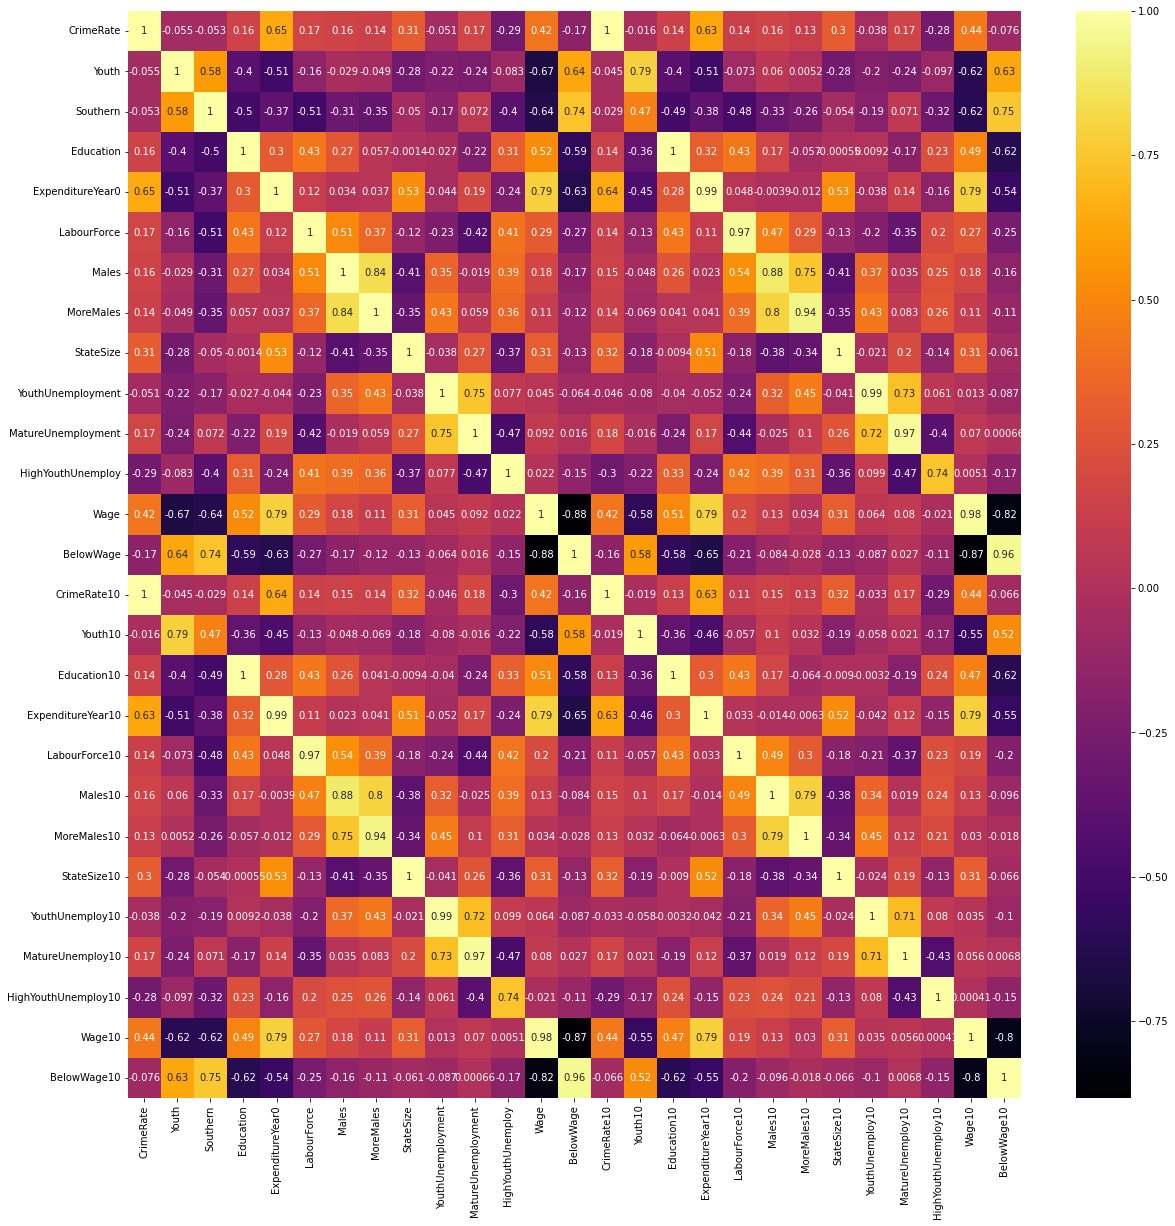

In [7]:
plt.subplots(figsize = (20,20))
sns.heatmap(dataset.corr(), annot=True, cmap="inferno")

# Check distributions

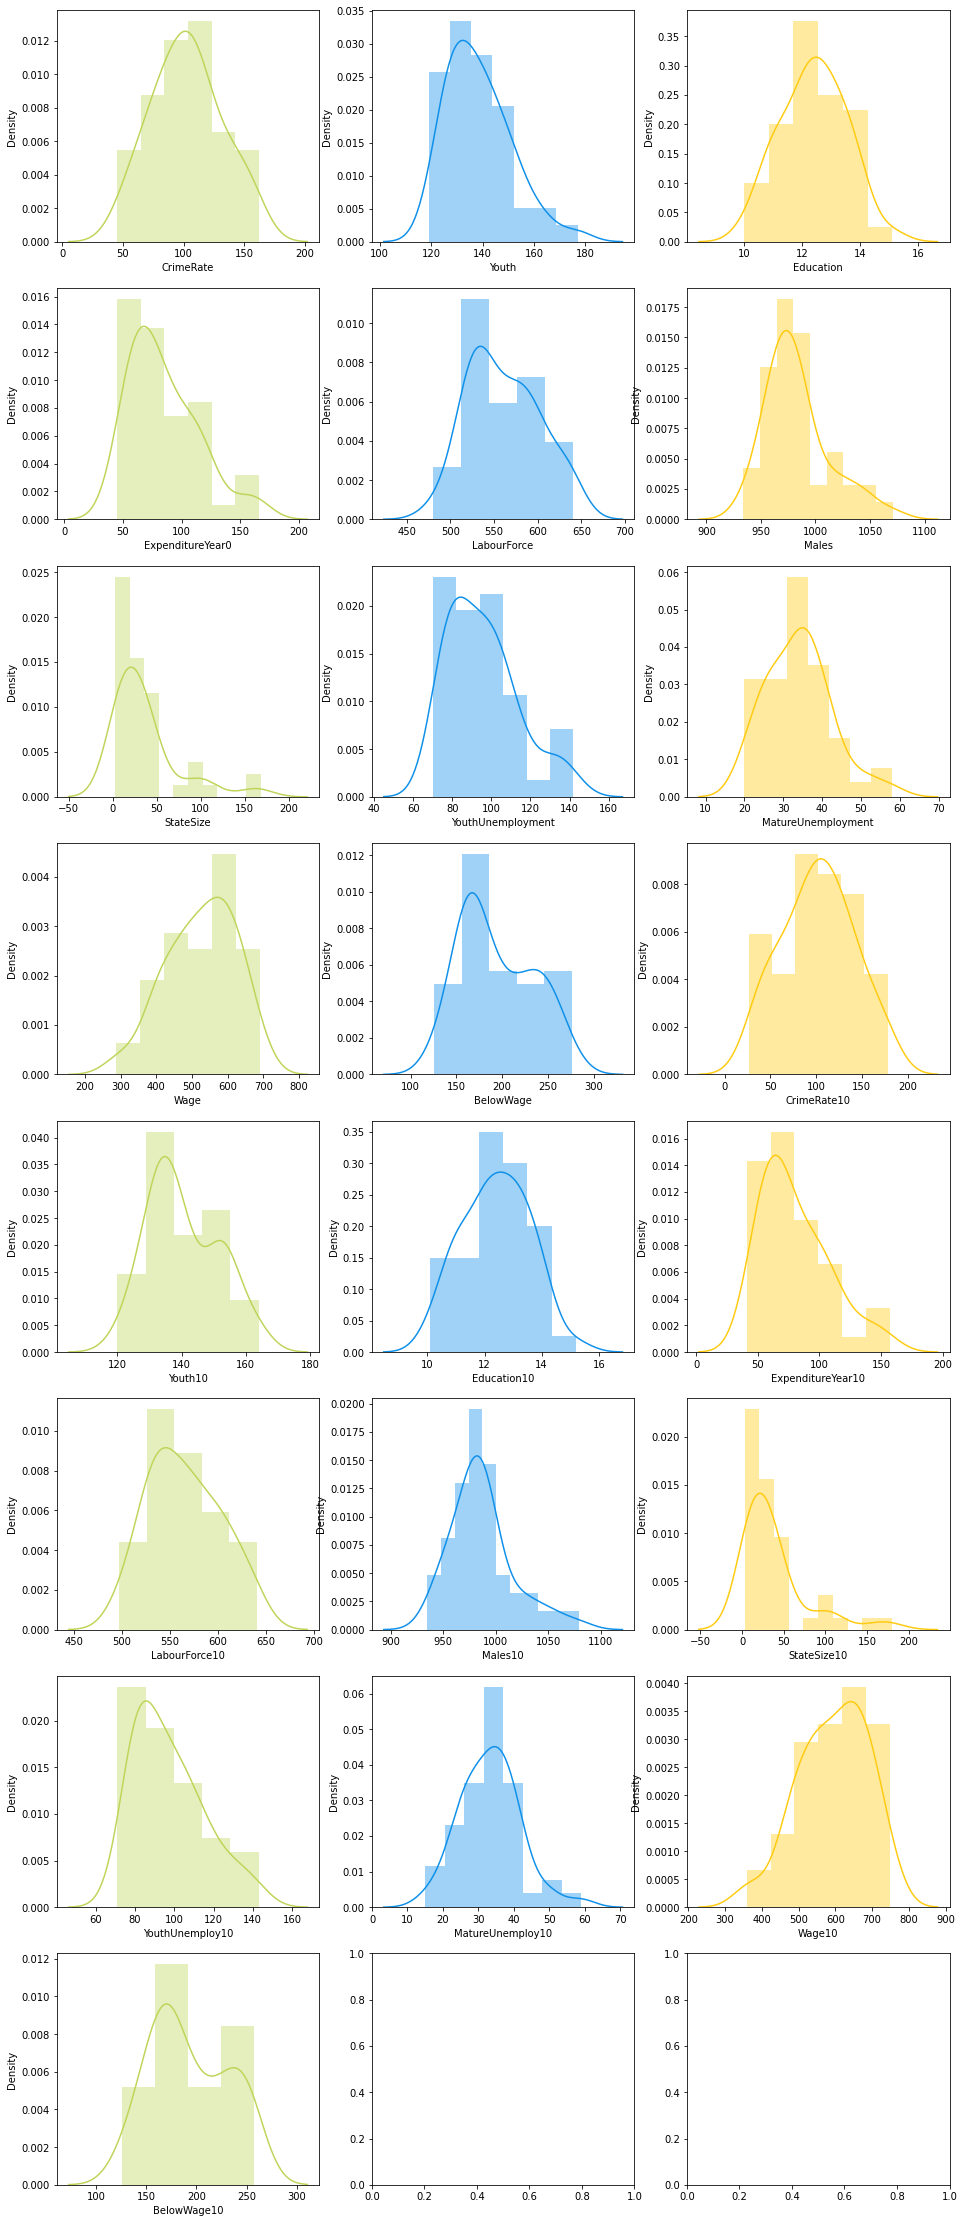

In [8]:
nums = [column for column in dataset.columns if dataset[column].max() > 1 or dataset[column].min()<0]
colors = ["#bed55a", "#0f90e9", "#ffcb12"]
ncols = len(colors)

fig, axs = plt.subplots(nrows = len(nums)//ncols +1, ncols = ncols, figsize = (16,40))
for i, column in enumerate(nums):
    sns.distplot(dataset[column], ax = axs[i//ncols][i%ncols], color=colors[i%ncols])

# Remove Multicollinearity

<AxesSubplot:>

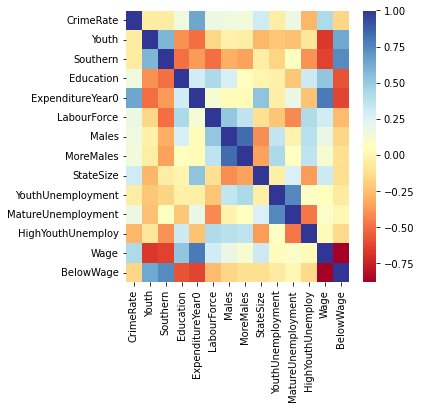

In [9]:
dataset_cropped = dataset[dataset.columns[:14]]

plt.subplots(figsize = (5,5))
sns.heatmap(dataset_cropped.corr(), cmap="RdYlBu")

# Select x and y variables

In [10]:
X = dataset[dataset.columns[1:]]
y = dataset['CrimeRate']

X_ = dataset_cropped[dataset_cropped.columns[1:]]
y_ = dataset_cropped['CrimeRate']

# Scaling & Splitting the data

In [11]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_ = scaler.fit_transform(X_) 

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state = 1, test_size = .25)
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_scaled_, y_, random_state = 1, test_size = .25)

# Preparing and testing linear regression model

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)
print("Interception: ", model.intercept_)
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])  
print(coeff_df)

preds = model.predict(X_test)

print('Mean Absolute Error:', mean_absolute_error(y_test, preds))  
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, preds)))
print("Score: ", model.score(X_test, y_test))

model.fit(X_train_, y_train_)
preds_ = model.predict(X_test_)

print("Score no multicollinearity: ", model.score(X_test_, y_test_))

df = pd.DataFrame({"Original": y_test, "Prediction": preds.flatten(), "Prediction No Multicol": preds_.flatten()})
df

Interception:  102.6686813868096
                     Coefficient
Youth                  -1.091817
Southern               -0.205089
Education               3.800156
ExpenditureYear0        9.145980
LabourForce            -0.196874
Males                  -2.425449
MoreMales              -0.170725
StateSize             -29.529979
YouthUnemployment      -5.570691
MatureUnemployment     -3.735665
HighYouthUnemploy       1.023007
Wage                   -3.253924
BelowWage               2.874200
CrimeRate10            28.937417
Youth10                -0.193416
Education10            -4.109186
ExpenditureYear10      -7.840372
LabourForce10           0.821495
Males10                 1.514221
MoreMales10            -0.164138
StateSize10            27.729519
YouthUnemploy10         5.630580
MatureUnemploy10        3.887688
HighYouthUnemploy10    -0.477360
Wage10                  2.263144
BelowWage10            -2.581989
Mean Absolute Error: 2.609872852832195
Root Mean Squared Error: 3.1479462663

,Original,Prediction,Prediction No Multicol
24,104.3,105.530797,88.768415
22,99.9,98.866549,95.968360
39,135.5,129.040367,124.285124
35,121.6,123.572511,104.231302
2,56.6,56.434159,91.473000
3,60.3,57.708303,109.325649
29,109.4,112.794668,125.195429
32,115.1,119.695052,101.009552
45,157.7,153.988713,159.432056
26,106.6,105.477335,103.161729
